In [1]:
import pandas as pd
import numpy as np
# fix random seed for reproducibility
np.random.seed(7)

In [2]:
cleaned = pd.read_csv('datasets/cleaned_Izends_Data_Thru201712_ver5.csv',index_col=0)

/home/ubuntu/insurance_izenda_analysis/insurace_izenda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
cleaned_loss_des = pd.read_csv('hashed_cleaned_loss_desc_from_5_ipynb.csv',index_col=0)
# changing dtype of hashed_loss_desc_padded column
cleaned_loss_des['hashed_loss_desc_padded'] = cleaned_loss_des['hashed_loss_desc_padded'].apply(lambda x: np.fromstring(x[1:-1],dtype='int32',sep=' '))

In [4]:
cleaned_combined = pd.merge(cleaned,cleaned_loss_des[['EstimateTotal_bins','hashed_loss_desc_padded']],left_index=True,right_index=True)

In [5]:
cleaned_combined.shape

(766408, 28)

In [6]:
cleaned_combined.columns

Index(['DisplayName', 'DivisionName', 'City', 'Zip', 'State', 'LossYearMo',
       'StartedFlag', 'CommOrRes', 'NoteCount', 'PhotoCount', 'JobCount',
       'ClaimCount', 'EstimateTotal', 'PolicyHolderType', 'LossDescription',
       'Estimate_NetClaim', 'Estimate_MaterialSaleTax', 'Estimate_OverHead',
       'Estimate_Profit', 'Estimate_PctOverhead', 'Estimate_PctProfit',
       'Estimate_Deductible', 'Estimate_BaseSvcCharge',
       'CleanAddressFranchisorID', 'CleanAddressContactID', 'LossMo',
       'EstimateTotal_bins', 'hashed_loss_desc_padded'],
      dtype='object')

# Defining X and Y

In [7]:
X1 = cleaned_combined[['DisplayName', 'DivisionName','LossMo','CommOrRes','PolicyHolderType','NoteCount','PhotoCount','JobCount','ClaimCount','LossYearMo']]
y = cleaned_combined['EstimateTotal_bins']

# Getting Dummies

In [8]:
X1_dummies = pd.get_dummies(X1,sparse=True)

In [9]:
# all_data = pd.merge(X1_dummies,pd.DataFrame(X2),left_index=True,right_index=True)
all_data = X1_dummies
all_data['EstimateTotal_bins'] = y

# Splitting data

In [10]:
test2017=all_data[all_data["LossYearMo"].apply(lambda all_data:all_data>=201701)]
learning=all_data[all_data["LossYearMo"].apply(lambda all_data:all_data<201701)]

In [11]:
learning_x = learning[learning.columns.difference(['LossYearMo','EstimateTotal_bins'])]
learning_y = learning['EstimateTotal_bins']
# learning_y_dummies = pd.get_dummies(learning_y,sparse=True)

In [12]:
test2017_x1 = test2017[test2017.columns.difference(['LossYearMo','EstimateTotal_bins','hashed_loss_desc_padded'])]
# test2017_x2 = test2017['hashed_loss_desc_padded']
test2017_y = test2017['EstimateTotal_bins']
# test2017_y_dummies = pd.get_dummies(test2017_y,sparse=True)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(learning_x, learning_y, test_size=0.33, random_state=42)

In [14]:
# X1_train = X_train[X_train.columns.difference(['hashed_loss_desc_padded'])]
# X2_train = X_train['hashed_loss_desc_padded']

In [15]:
# X1_val = X_val[X_val.columns.difference(['hashed_loss_desc_padded'])]
# X2_val = X_val['hashed_loss_desc_padded']

# XGBOOST Model

In [16]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score

In [18]:
alg = XGBClassifier( colsample_bytree=0.8, gamma=0, learning_rate=0.1,
    max_depth=5, min_child_weight=1, n_estimators=5000, objective="multi:softprob",
    reg_alpha=0, reg_lambda=0,
    seed=7, silent=True, subsample=0.8,n_jobs=-1)

In [19]:
eval_set = [(X_val,y_val)]

In [20]:
alg.fit(X_train, y_train,eval_metric='mlogloss', early_stopping_rounds=10, eval_set = eval_set, verbose = True)

[0]	validation_0-mlogloss:2.28787
Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:2.27501
[2]	validation_0-mlogloss:2.26284
[3]	validation_0-mlogloss:2.25246
[4]	validation_0-mlogloss:2.24291
[5]	validation_0-mlogloss:2.23399
[6]	validation_0-mlogloss:2.2269
[7]	validation_0-mlogloss:2.2196
[8]	validation_0-mlogloss:2.21308
[9]	validation_0-mlogloss:2.20747
[10]	validation_0-mlogloss:2.20207
[11]	validation_0-mlogloss:2.19699
[12]	validation_0-mlogloss:2.19208
[13]	validation_0-mlogloss:2.18753
[14]	validation_0-mlogloss:2.18335
[15]	validation_0-mlogloss:2.17952
[16]	validation_0-mlogloss:2.17617
[17]	validation_0-mlogloss:2.17259
[18]	validation_0-mlogloss:2.1692
[19]	validation_0-mlogloss:2.16623
[20]	validation_0-mlogloss:2.16349
[21]	validation_0-mlogloss:2.16084
[22]	validation_0-mlogloss:2.15817
[23]	validation_0-mlogloss:2.15579
[24]	validation_0-mlogloss:2.15353
[25]	validation_0-mlogloss:2.15159
[26]	validation_0-mlogloss:2.14967

[230]	validation_0-mlogloss:2.0765
[231]	validation_0-mlogloss:2.07639
[232]	validation_0-mlogloss:2.07631
[233]	validation_0-mlogloss:2.07623
[234]	validation_0-mlogloss:2.07612
[235]	validation_0-mlogloss:2.07604
[236]	validation_0-mlogloss:2.07596
[237]	validation_0-mlogloss:2.07582
[238]	validation_0-mlogloss:2.07573
[241]	validation_0-mlogloss:2.07545
[242]	validation_0-mlogloss:2.07537
[243]	validation_0-mlogloss:2.07531
[244]	validation_0-mlogloss:2.0752
[245]	validation_0-mlogloss:2.07509
[246]	validation_0-mlogloss:2.07496
[247]	validation_0-mlogloss:2.07488
[248]	validation_0-mlogloss:2.07478
[249]	validation_0-mlogloss:2.07467
[250]	validation_0-mlogloss:2.07458
[251]	validation_0-mlogloss:2.07448
[252]	validation_0-mlogloss:2.07439
[253]	validation_0-mlogloss:2.07431
[254]	validation_0-mlogloss:2.07421
[255]	validation_0-mlogloss:2.07413
[256]	validation_0-mlogloss:2.07401
[257]	validation_0-mlogloss:2.07391
[258]	validation_0-mlogloss:2.07382
[259]	validation_0-mlogloss:2.

[461]	validation_0-mlogloss:2.06154
[462]	validation_0-mlogloss:2.06148
[463]	validation_0-mlogloss:2.06143
[464]	validation_0-mlogloss:2.06139
[465]	validation_0-mlogloss:2.06137
[466]	validation_0-mlogloss:2.06133
[467]	validation_0-mlogloss:2.06129
[468]	validation_0-mlogloss:2.06124
[469]	validation_0-mlogloss:2.06122
[470]	validation_0-mlogloss:2.06119
[471]	validation_0-mlogloss:2.06111
[472]	validation_0-mlogloss:2.06107
[473]	validation_0-mlogloss:2.06101
[474]	validation_0-mlogloss:2.06099
[475]	validation_0-mlogloss:2.06094
[476]	validation_0-mlogloss:2.06092
[477]	validation_0-mlogloss:2.06088
[478]	validation_0-mlogloss:2.06085
[479]	validation_0-mlogloss:2.06079
[480]	validation_0-mlogloss:2.06073
[481]	validation_0-mlogloss:2.06069
[482]	validation_0-mlogloss:2.06066
[483]	validation_0-mlogloss:2.06064
[484]	validation_0-mlogloss:2.06057
[485]	validation_0-mlogloss:2.06053
[486]	validation_0-mlogloss:2.06049
[487]	validation_0-mlogloss:2.06045
[488]	validation_0-mlogloss:

[689]	validation_0-mlogloss:2.05427
[690]	validation_0-mlogloss:2.05425
[691]	validation_0-mlogloss:2.05421
[692]	validation_0-mlogloss:2.05419
[693]	validation_0-mlogloss:2.05417
[694]	validation_0-mlogloss:2.05409
[695]	validation_0-mlogloss:2.05408
[696]	validation_0-mlogloss:2.05407
[697]	validation_0-mlogloss:2.05406
[698]	validation_0-mlogloss:2.05403
[699]	validation_0-mlogloss:2.05401
[700]	validation_0-mlogloss:2.05399
[701]	validation_0-mlogloss:2.05395
[702]	validation_0-mlogloss:2.05392
[703]	validation_0-mlogloss:2.05391
[704]	validation_0-mlogloss:2.05389
[705]	validation_0-mlogloss:2.05387
[706]	validation_0-mlogloss:2.05383
[707]	validation_0-mlogloss:2.05381
[708]	validation_0-mlogloss:2.0538
[709]	validation_0-mlogloss:2.05375
[710]	validation_0-mlogloss:2.05371
[711]	validation_0-mlogloss:2.0537
[712]	validation_0-mlogloss:2.05368
[713]	validation_0-mlogloss:2.05365
[714]	validation_0-mlogloss:2.05362
[715]	validation_0-mlogloss:2.05361
[716]	validation_0-mlogloss:2.

[918]	validation_0-mlogloss:2.05062
[919]	validation_0-mlogloss:2.05062
[920]	validation_0-mlogloss:2.05061
[921]	validation_0-mlogloss:2.05059
[922]	validation_0-mlogloss:2.05059
[923]	validation_0-mlogloss:2.05051
[924]	validation_0-mlogloss:2.05051
[925]	validation_0-mlogloss:2.0505
[926]	validation_0-mlogloss:2.05047
[927]	validation_0-mlogloss:2.05045
[928]	validation_0-mlogloss:2.05043
[929]	validation_0-mlogloss:2.05041
[930]	validation_0-mlogloss:2.0504
[931]	validation_0-mlogloss:2.0504
[932]	validation_0-mlogloss:2.05038
[933]	validation_0-mlogloss:2.05036
[934]	validation_0-mlogloss:2.05035
[935]	validation_0-mlogloss:2.05033
[936]	validation_0-mlogloss:2.05032
[937]	validation_0-mlogloss:2.05025
[938]	validation_0-mlogloss:2.05024
[939]	validation_0-mlogloss:2.05023
[940]	validation_0-mlogloss:2.0502
[941]	validation_0-mlogloss:2.05013
[942]	validation_0-mlogloss:2.05012
[943]	validation_0-mlogloss:2.05011
[944]	validation_0-mlogloss:2.0501
[945]	validation_0-mlogloss:2.050

[1143]	validation_0-mlogloss:2.04796
[1144]	validation_0-mlogloss:2.04795
[1145]	validation_0-mlogloss:2.04794
[1146]	validation_0-mlogloss:2.04794
[1147]	validation_0-mlogloss:2.04793
[1148]	validation_0-mlogloss:2.04793
[1149]	validation_0-mlogloss:2.04792
[1150]	validation_0-mlogloss:2.04791
[1151]	validation_0-mlogloss:2.04791
[1152]	validation_0-mlogloss:2.04792
[1153]	validation_0-mlogloss:2.04791
[1154]	validation_0-mlogloss:2.04792
[1155]	validation_0-mlogloss:2.04791
[1156]	validation_0-mlogloss:2.0479
[1157]	validation_0-mlogloss:2.04789
[1158]	validation_0-mlogloss:2.0479
[1159]	validation_0-mlogloss:2.0479
[1160]	validation_0-mlogloss:2.04788
[1161]	validation_0-mlogloss:2.04787
[1162]	validation_0-mlogloss:2.04787
[1163]	validation_0-mlogloss:2.04787
[1164]	validation_0-mlogloss:2.04786
[1165]	validation_0-mlogloss:2.04786
[1166]	validation_0-mlogloss:2.04786
[1167]	validation_0-mlogloss:2.04785
[1168]	validation_0-mlogloss:2.04784
[1169]	validation_0-mlogloss:2.04782
[117

[1366]	validation_0-mlogloss:2.0467
[1367]	validation_0-mlogloss:2.04671
[1368]	validation_0-mlogloss:2.04667
[1369]	validation_0-mlogloss:2.04668
[1370]	validation_0-mlogloss:2.04668
[1371]	validation_0-mlogloss:2.04667
[1372]	validation_0-mlogloss:2.04667
[1373]	validation_0-mlogloss:2.04668
[1374]	validation_0-mlogloss:2.04669
[1375]	validation_0-mlogloss:2.04669
[1376]	validation_0-mlogloss:2.04669
[1377]	validation_0-mlogloss:2.04666
[1378]	validation_0-mlogloss:2.04666
[1379]	validation_0-mlogloss:2.04665
[1380]	validation_0-mlogloss:2.04665
[1381]	validation_0-mlogloss:2.04665
[1382]	validation_0-mlogloss:2.04665
[1383]	validation_0-mlogloss:2.04665
[1384]	validation_0-mlogloss:2.04666
[1385]	validation_0-mlogloss:2.04666
[1386]	validation_0-mlogloss:2.04666
[1387]	validation_0-mlogloss:2.04665
[1388]	validation_0-mlogloss:2.04664
[1389]	validation_0-mlogloss:2.04664
[1390]	validation_0-mlogloss:2.04664
[1391]	validation_0-mlogloss:2.04663
[1392]	validation_0-mlogloss:2.04664
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=5000,
       n_jobs=-1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=0, scale_pos_weight=1, seed=7, silent=True,
       subsample=0.8)

# Calculating Test Accuracy

In [22]:
test2017_preds = alg.predict(test2017_x1)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(test2017_y,test2017_preds)

0.2257040335155648

In [33]:
accuracy_score(test2017_y,test2017_preds)

0.24059065546976272

# Confusion Matrix

In [28]:
def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm_perc, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap =sns.cm.rocket_r)
    plt.show()

In [27]:
labels = ['a','b','c','d','e','f','g','h','i','j']

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

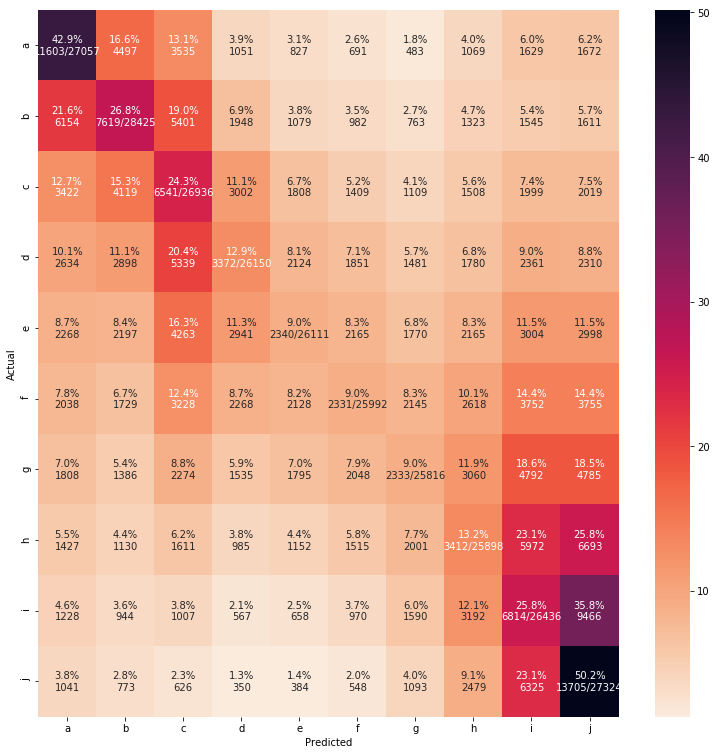

In [31]:
cm_analysis(test2017_y,test2017_preds, labels, ymap=None, figsize=(13,13))